NPM : 5210411367
Nama: Muhammad Insan Kamil

# GrayScaling

<ipython-input-3-57b0f36e7cbe>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_libgray = rgb2gray(img)


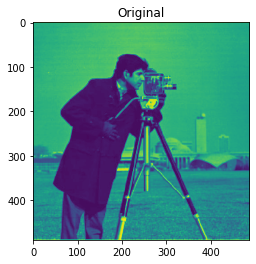

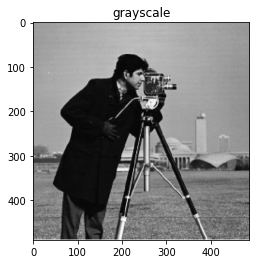

In [ ]:
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img = io.imread("/content/The-original-cameraman-image.png")

#Menggunakan Library
img_libgray = rgb2gray(img)

plt.figure()
plt.title('Original')
plt.imshow(img)
plt.figure()
plt.title('grayscale')
plt.imshow(img_libgray,cmap=plt.cm.gray)

# Binerisasi/Thressholding

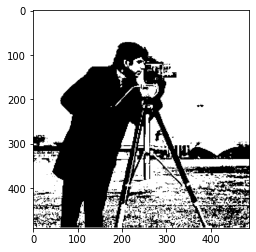

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

def quantization(img):
  img_q=np.zeros((img.shape[0], img.shape[1]))
  for r in range(0,img.shape[0]):
    for c in range(0,img.shape[1]):
      if img[r,c]<118:
        img_q[r,c] = 0
      else:
        img_q[r,c] =1
  return img_q

img_biner = quantization(img)

plt.imshow(img_biner, cmap=plt.cm.gray)#menaikkan brightnes dari sebuah pict

# Dilasi dengan structuring 5*10


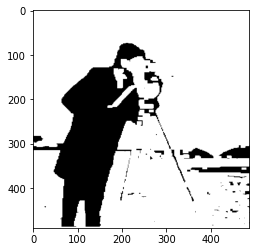

In [ ]:
import math

def dilasi(img,struc):
  #jumlah padding
  pad_size = math.floor(struc.shape[0]/2)
  #buat gambar baru
  img_padd = np.zeros((img.shape[0]*pad_size,img.shape[1]*pad_size))
  #gambar lama masukkan ke gambar berpadding
  for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      img_padd[r+pad_size, c+pad_size] = img[r,c]
  #mengaplikasikan konvolusi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
    for c in range(img_akhir.shape[1]):
      for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
          img_akhir[r,c] += struc[i,j]*img_padd[r+i,c+j]
      if img_akhir[r,c] == 0:
        img_akhir[r,c] = 0
      else :
        img_akhir[r,c] = 1
      #######
      # jika miss = 0
      # jika hit/fit= 1
      #######
  return img_akhir

struc_elem = np.ones([5,10])
img_dil=dilasi(img_biner,struc_elem)

plt.imshow(img_dil, cmap=plt.cm.gray)

# Erosi 10*5

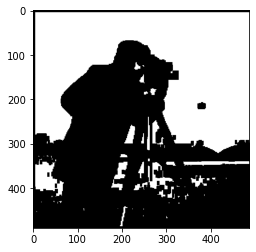

In [ ]:
import numpy as np
import math
def erosi(img,struc):
  #Jumlah Padding
  pad_size = math.floor(struc.shape[0]/2)
  #Buat gambar baru
  img_padd = np.zeros((img.shape[0]*pad_size,img.shape[1]*pad_size))
  #gambar lama masukkan ke gambar ber padding
  for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      img_padd[r+pad_size,c+pad_size] = img[r,c]
  #mengaplikasikan konvolusi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
    for c in range(img_akhir.shape[1]):
      for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
          img_akhir[r,c] += struc[i,j]*img_padd[r+i,c+j]
      if img_akhir[r,c] == struc.shape[0]*struc.shape[1]:
        img_akhir[r,c] = 1
      else:
        img_akhir[r,c]= 0
  return img_akhir

struc_el = np.ones([10,5])
img_er = erosi(img_biner,struc_el)
plt.imshow(img_er,cmap=plt.cm.gray)

# Crop citra berdasarkan bounding box

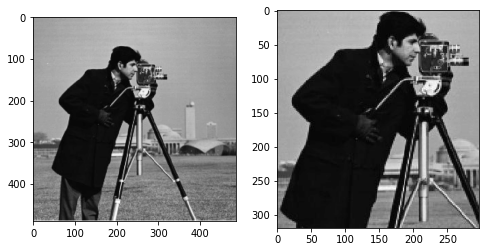

In [ ]:
def croping(img,xL_diff,xR_diff,yB_diff,yT_diff):
  xL = xL_diff
  xR = img.shape[1] - xR_diff
  yB = yB_diff
  yT = img.shape[0] - yT_diff
  return img[yB:yT,xL:xR]

img_crop= croping(img_libgray,40,150,70,100)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.imshow(img_libgray, cmap=plt.cm.gray)
ax2.imshow(img_crop, cmap=plt.cm.gray)

# Kompresi dengan RLE

In [ ]:
def rle_encode(row_img):
   result = []
   run = 1
   for i in range(1,len(row_img)):
     if row_img[i] == row_img[i-1]:
       run += 1
     else :
       result.append((run,row_img[i-1]))
       run = 1
   result.append((run,int(row_img[-1])))
   return result

In [ ]:
def rle_encode_img(image):
  result = []
  for row in image:
    result.append(rle_encode(row))
  return result

img_enc =rle_encode_img(img_libgray)
print(img_enc)

[[(1, 249), (2, 251), (1, 253), (2, 255), (2, 253), (1, 251), (2, 253), (4, 255), (7, 253), (2, 255), (1, 253), (2, 255), (3, 253), (2, 255), (1, 253), (3, 255), (2, 253), (12, 255), (1, 253), (21, 255), (3, 253), (25, 255), (4, 253), (16, 255), (2, 251), (3, 253), (5, 255), (2, 253), (4, 255), (5, 253), (35, 255), (1, 253), (17, 255), (2, 253), (9, 255), (3, 253), (2, 255), (1, 253), (4, 255), (2, 253), (3, 255), (2, 253), (52, 255), (1, 253), (4, 255), (1, 253), (8, 255), (2, 253), (44, 255), (2, 253), (50, 255), (2, 253), (4, 255), (1, 253), (4, 255), (1, 253), (8, 255), (2, 253), (2, 255), (2, 253), (2, 255), (1, 253), (3, 251), (2, 253), (17, 255), (2, 253), (1, 251), (2, 253), (1, 255), (3, 253), (8, 255), (2, 253), (11, 255), (3, 253), (5, 255), (6, 253), (3, 255), (1, 253), (1, 251), (1, 253)], [(2, 159), (1, 161), (2, 159), (1, 157), (4, 155), (2, 157), (1, 159), (3, 157), (4, 159), (1, 161), (1, 159), (2, 161), (1, 159), (2, 161), (1, 159), (1, 157), (1, 159), (1, 161), (1, 1

# Dekompresi

In [ ]:
def rle_decode(encoded):
  result = []
  for run, value in encoded:
    result.append(run * str(value))
  int_result = [int(a) for a in result]
  return int_result

In [ ]:
def rle_decode_img(encoded_image):
  result = []
  for row in encoded_image:
    result.append(rle_decode(row))
  return result

In [ ]:
img_dec =rle_decode_img(img_enc)
print(img_dec)

[[249, 251251, 253, 255255, 253253, 251, 253253, 255255255255, 253253253253253253253, 255255, 253, 255255, 253253253, 255255, 253, 255255255, 253253, 255255255255255255255255255255255255, 253, 255255255255255255255255255255255255255255255255255255255255255, 253253253, 255255255255255255255255255255255255255255255255255255255255255255255255255, 253253253253, 255255255255255255255255255255255255255255255255, 251251, 253253253, 255255255255255, 253253, 255255255255, 253253253253253, 255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255, 253, 255255255255255255255255255255255255255255255255255, 253253, 255255255255255255255255255, 253253253, 255255, 253, 255255255255, 253253, 255255255, 253253, 255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255255, 253, 255255255255, 253, 255255255255255255255255, 253253, 25525525525525525525525525525525